In [9]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath(".."))
from util import fetch_raw_data, color_dark

# Shortest Path kernel transformation

In [4]:
{i:i for i in range(5)}

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [36]:
G = nx.fast_gnp_random_graph(5, 0.3)
nx.set_node_attributes(G, {i:(i+1) for i in range(5)},name = 'label')

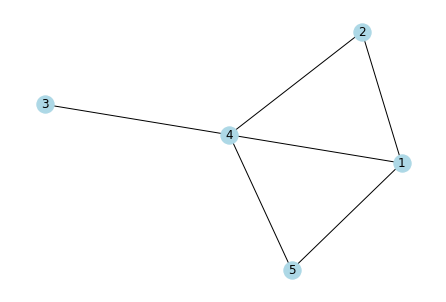

In [37]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, labels={i:(i+1) for i in range(5)}, with_labels = True, node_color = 'lightblue')


Create shortest path graph

In [38]:
G_sp = nx.Graph()
for k,sps in nx.shortest_path(G).items():
    for v, path in sps.items():
        if v == k:
            continue
        G_sp.add_edge(k, v, weight = len(path)-1)


{(0, 1): Text(0.5242482123794497, 0.2623077931517329, '1'),
 (0, 3): Text(0.22457849654457024, -0.04948912903338352, '1'),
 (0, 4): Text(0.3654378907371756, -0.4583628642816695, '1'),
 (0, 2): Text(-0.19286770016940225, 0.042501379762810376, '2'),
 (1, 3): Text(0.13456210926282447, 0.34818054438535584, '1'),
 (1, 4): Text(0.27542150345542976, -0.06069319086293018, '2'),
 (1, 2): Text(-0.282884087451148, 0.4401710531815497, '2'),
 (3, 2): Text(-0.5825538032860275, 0.12837413099643327, '1'),
 (3, 4): Text(-0.0242482123794497, -0.37249011304804663, '1'),
 (4, 2): Text(-0.44169440909342217, -0.2804996042518527, '2')}

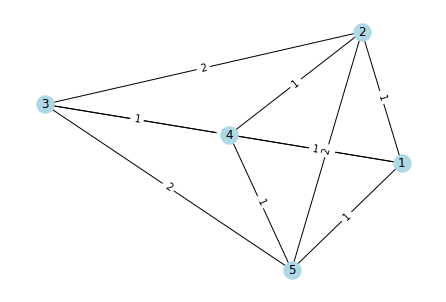

In [39]:
nx.draw(G_sp, pos, labels={i:(i+1) for i in range(5)}, with_labels = True, node_color = 'lightblue')
labels = nx.get_edge_attributes(G_sp,'weight')
nx.draw_networkx_edge_labels(G_sp,pos,edge_labels=labels)

# EUSN 2022

In [2]:
return_pivot, esg_pivot, sector_classification = fetch_raw_data("C:/Users/User/Code/MMD_Graph_Diversification/")

2014-10-01 00:00:00
2022-02-01 00:00:00


In [3]:
# esg smoothed stock
gp_esg_stock = pd.read_pickle('../data/tidy/gp_esg_stock_data_frame.pkl')

In [28]:
sector_classification.keys()

dict_keys(['Industrials', 'Healthcare', 'Technology', 'Communication Services', 'Consumer Defensive', 'Consumer Cyclical', 'Utilities', 'Financial Services', 'Basic Materials', 'Real Estate', 'Energy'])

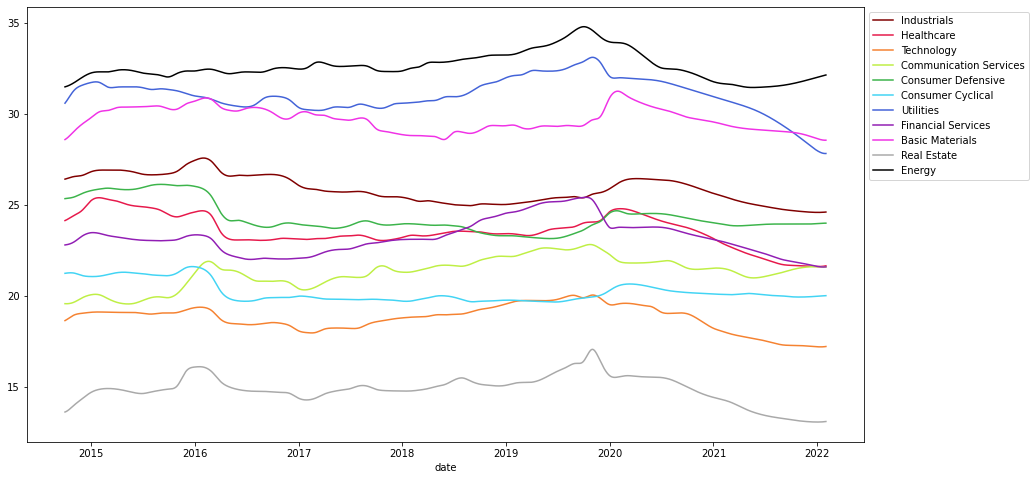

In [29]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
colors = ['#800000', '#e6194B', '#f58231', '#bfef45', '#3cb44b', '#42d4f4', '#4363d8', '#911eb4', '#f032e6', '#a9a9a9', '#000000' ]
for i,k in enumerate(sector_classification.keys()):
    tmp = gp_esg_stock.loc[:, np.isin(gp_esg_stock.columns, sector_classification[k])].mean(axis = 1)
    tmp.plot(label = k, ax = ax, color = colors [i])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

C:\Users\User\AppData\Local\Temp\ipykernel_19728\465639865.py:9: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  gp_esg_stock.index.ravel(),
C:\Users\User\AppData\Local\Temp\ipykernel_19728\465639865.py:9: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  gp_esg_stock.index.ravel(),
C:\Users\User\AppData\Local\Temp\ipykernel_19728\465639865.py:9: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  gp_esg_stock.index.ravel(),
C:\Users\User\AppData\Local\Temp\ipykernel_19728\465639865.py:9: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  gp_esg_stock.index.ravel(),
C:\Users\User\AppData\Local\Temp\ipykernel_19728\465639865.py:9: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view

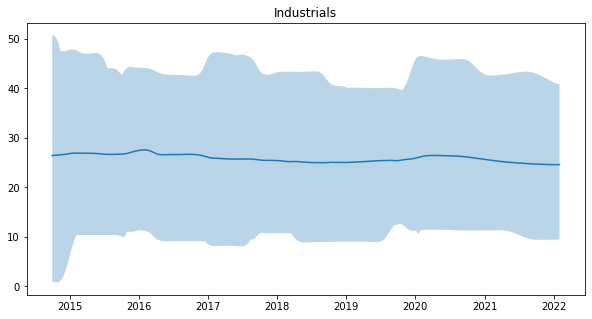

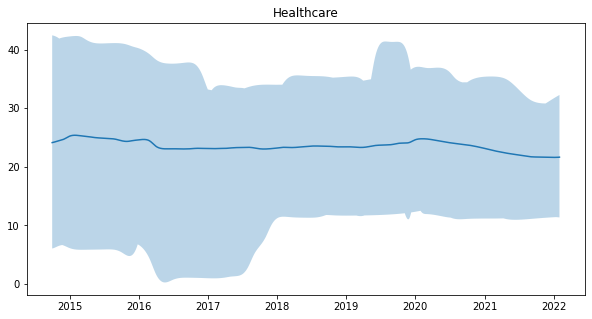

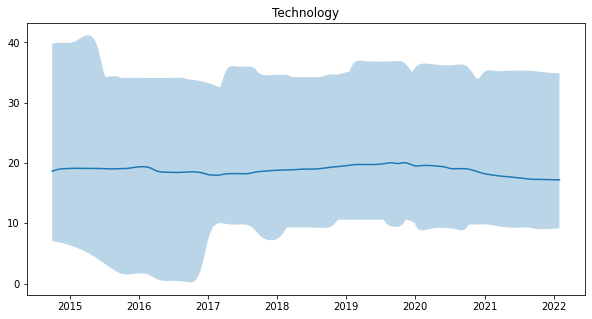

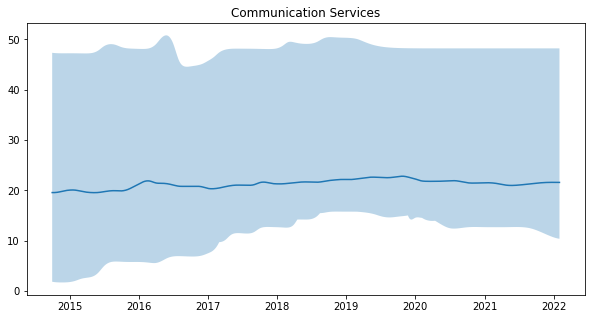

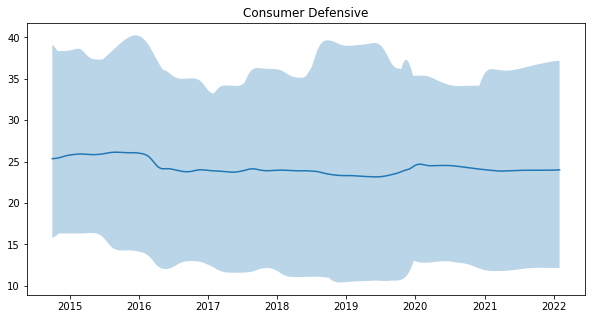

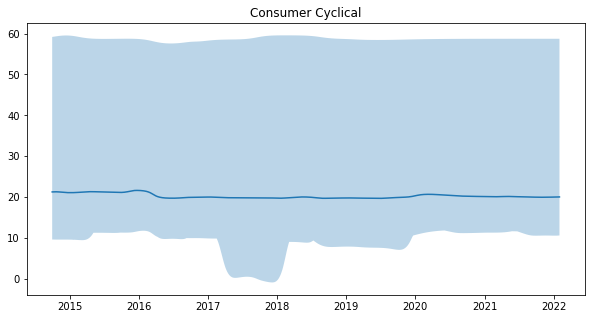

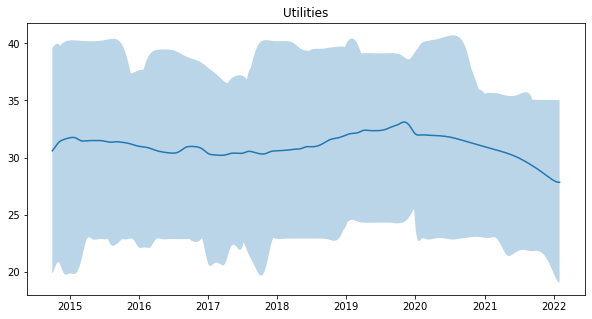

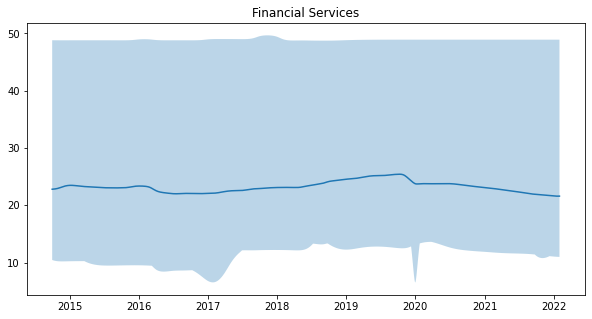

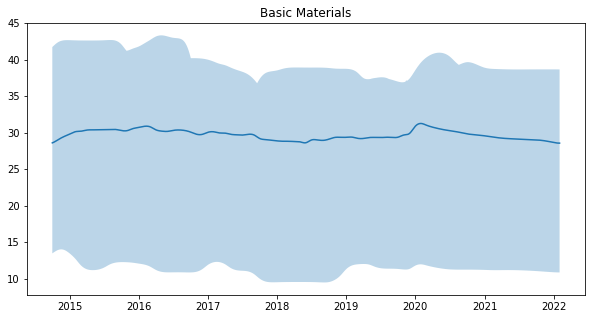

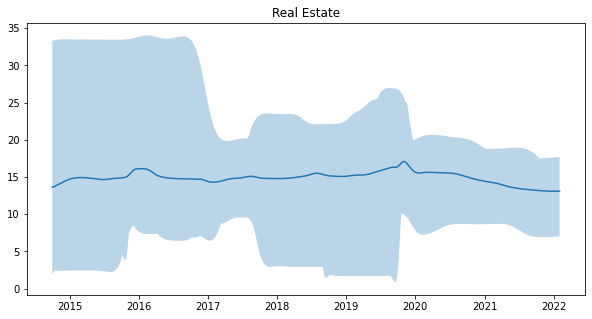

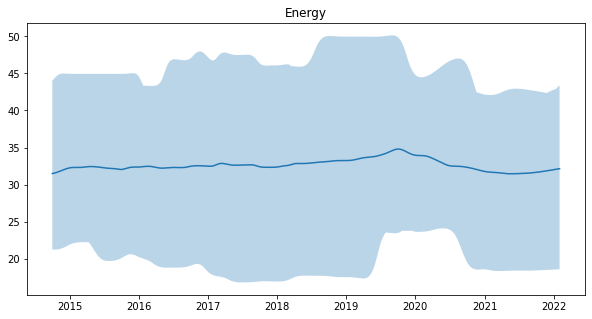

In [41]:
for k in sector_classification.keys():
    tmp = gp_esg_stock.loc[:, np.isin(gp_esg_stock.columns, sector_classification[k])].mean(axis = 1)
    tmp_max = gp_esg_stock.loc[:, np.isin(gp_esg_stock.columns, sector_classification[k])].max(axis = 1)
    tmp_min = gp_esg_stock.loc[:, np.isin(gp_esg_stock.columns, sector_classification[k])].min(axis = 1)

    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.plot(gp_esg_stock.index, tmp)
    ax.fill_between(
        gp_esg_stock.index.ravel(),
        np.array(tmp_max) ,
        np.array(tmp_min) ,
        alpha=0.3
    )
    ax.set_title(f'{k}')